# Making a Spectral Index Colour Map with Three Divergent Boundary Points.

This notebook is Tutorial 1 of the [```CosmosCanvas```](https://github.com/mlarichardson/CosmosCanvas) package. This Python 3 tutorial highlights the creation of a perception-based colour map designed for plotting spectral index data, maps of $\alpha$ where $I_\nu \propto \nu^\alpha$. 

*Construction of the Spectral Index Colour Map*:
This colour map has two main divergent points and the default settings for the values of these points are based on physics and conventional definitions for "steep" slopes and "flat" slopes in the spectral energy distribution in the radio regime. This makes the map immediately useful, although the values for these points can be changed by the user. These default divergent points are:

- a) The "Steep" divergent point of alpha = -0.8. This value is assigned bright orange and more negative values (steeper) transition sequentially through adjacent colours to yellow.  
- b) The "Flat" divergent point of alpha = -0.1. This value is dark cyan and more positive values (flatter) are sequential and end in dark plum.

Note that cyan is the complementary colour of orange. We blend these two colours together between a) and b) divergent points, creating 'compensating tones'. The third divergent point, halfway between a) and b), is where the two colours mix to form neutral grey. 

The overall scheme is monotonic in greyscale value with the lightest colours for steep slopes (e.g. yellow, the lightest colour, is steepest) and darkest colours for flat slopes (e.g. plum is the darkest and flattest). 

*Tutorial Aims* 
This tutorial begins by outlining the creation of the spectral index colour map using default and arbitrary settings for minimum and maximum values for the "steep_p" and "flat_p" parameters set in `specindex.py`.  Subsequently the tutorial shows the use of the cmap = specindex in `specindex.py` for plotting examples of galaxy data. The first example uses the default value; the second uses arbitrary values for divergent points a) and b) along with different minima and maxima for the range of values. Our examples include plotting the whole data range with set divergent points and specifying tick marks on a colour bar.  

Finally we produce an equilumant colour map based on the explorations of constant L and C in [```colourspace```](https://github.com/gillesferrand/colourspace). This colour map can be combined with intensity data without a major shift in light/dark values.  

Many users additionally require an error map for data measuring the uncertainties in spectral index. The "2. Plot Spectral Index Error.ipynb" notebook provides a tutorial for this. It uses cmap = specindex_error in `specindex.py` and demonstrates different parameter settings.   

*Package*
This package includes `specindex.py`, `velmap.py` and `galfits.py` for plotting; the latter requires the installation of `Astropy`.
Additionally it uses the [```colourspace```](https://github.com/gillesferrand/colourspace) package by Gilles Ferrand for making custom colour maps in LCH colour space.

Authors: Mark L. A. Richardson, Gilles Ferrand, and Jayanne English, 7 Jan 2021.

Updated: J. English 10 Feb 2023. 

### The Colour Map

In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
# Import our package and the colourspace package
# If you work in a project directory, the code can be called from the CosmosCanvas local repository directory
# using this format: from CosmosCanvas import specindex as spx
import specindex as spx
from colourspace import maps

convertor = 'custom' (illuminant = 'D65')


In [3]:
# Make a folder for saving figures.
import os
plt_dir = 'plots'
if not os.path.exists(plt_dir): os.makedirs(plt_dir)

In [4]:
# Create the Default Colour Map. 

# Set min/max values
min_value = -1.5
max_value = 0.3

# Create spectral index cmap.
# This uses default steep/flat values used for "steepp" (=-0.8) and "flatp" (=-0.1) in specindex.py.
cmap = "CC-specindex-default"
spx.create_cmap_specindex(min_value,max_value,name=cmap)
# By default the colourmap is registered to the mpl namespace

loading gamut from /Users/english/pythonPackages/colourspace/gamut/Cmax_res10_full.npy
creating cmap 'CC-specindex-default' for Matplotlib (1022 steps)
registering cmap 'CC-specindex-default' to Matplotlib


This colour map is used in the figure below, on the left plot. Note, the colour map can be used for any range of values, even beyond the min_value and max_value defined here. The reason the min and max values are passed in is so that the Orange and Cyan points remain at the physically defined Steep and Flat values. But these values can be changed too, as in the following example. 

In [5]:
# Change data range and values of the main divergent points. 
min_value_compare = -2.0
max_value_compare = 2.0

steep_compare = -0.5
flat_compare = 0.5

cmap_compare = 'CC-specindex-compare'
spx.create_cmap_specindex(min_value_compare,max_value_compare,steep_p=steep_compare,flat_p=flat_compare,name=cmap_compare)

creating cmap 'CC-specindex-compare' for Matplotlib (1022 steps)
registering cmap 'CC-specindex-compare' to Matplotlib


By rescaling the maps to 0:1 using the test plotting function, we can compare two colour maps side by side:

writing  ./plots/test2cmap_CC-specindex.png


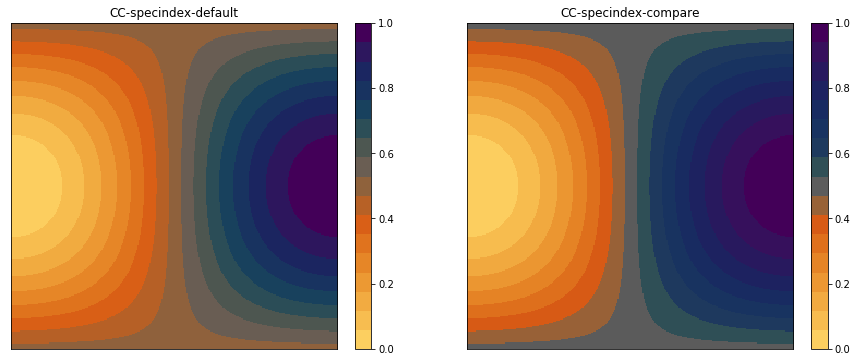

In [6]:
maps.test_cmaps(names=[cmap,cmap_compare],nsteps=[17]*2,subplots=(1,2),figsize=(15,6),fname=plt_dir+"/test2cmap_CC-specindex")

An important point here is the gray value marks the midpoint between steep and shallow, which is not necessarily at the middle of the full range colour map set by min_value and max_value.

From here on we will use the default colour map -- we hope the process for the comparison colour map makes it clear how to set different values for the steep (orange; steep_p) and flat (dark cyan; flat_p) points.

loading gamut from /Users/english/pythonPackages/colourspace/gamut/Cmax_res10_sRGB.npy


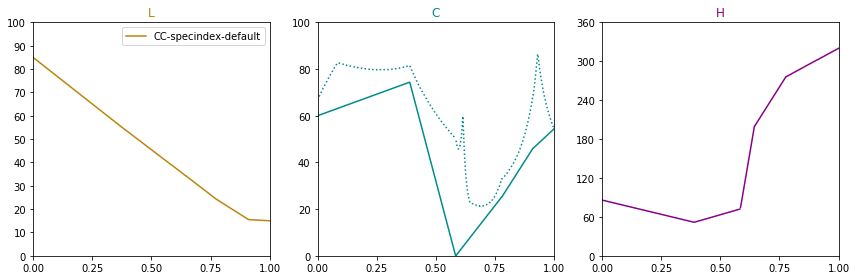

In [7]:
# Let's show the default colour map in LCH space, again rescaled to 0:1 using the plot_path function.
axes = maps.plot_path(cmap, space='LCH', stack='H', axes=[]  , styles=['-' ], legend_label=cmap)

In this case, L (luminosity) on the y-axis is monotonically decreasing in greyscale value as the data value x-axis increases. C (chroma) changes saturation with the data value; the dotted line shows the limits for chroma in the gamut of the sRGB colour space. Note the desaturation at neutral grey.  H (hue) on the y-axis is designated by an angle on the colour wheel. 

### Galaxy Spectral Index Maps

Now let's show what this colour map looks like for a galaxy. The galaxy used here is NGC 3079, taken from the CHANGES B configuration data. This is featured in [```Irwin et al. (2019)```](https://ui.adsabs.harvard.edu/abs/2019AJ....158...21I/abstract) and can be downloaded from the CHANG-ES catalogue at https://www.queensu.ca/changes/. We use the `Astropy` library to plot the FITS data. It is also provided in the example_data folder in `CosmosCanvas`.

In [8]:
import galfits as gal

In [9]:
# Set galaxy information
title='NGC 3079'
fits_file="example_data/SpecIndex_N3079.FITS"
RA = [10., 1., 57.8]    # hh.mm.ss
DEC = [55., 40., 47.0] # deg.mm.ss; negatives Dec format -dg.,-am.,-as

#The image can be trimmed to a rectangle or left as is.  To leave it as is, set
    #TrimSwitch='no_trim'
    #ImgSize=[]  #  We always need an image size to be passed to the code
#For Rectangle images set
TrimSwitch='rectangle'
ImgWidth=0.08  #degrees
ImgHeight=0.09 #degrees
ImgSize = [ImgWidth, ImgHeight] # degrees

#  For square images simply set ImgWidth=ImgHeight
shift = [0.0, 0.2/60.] # degrees

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


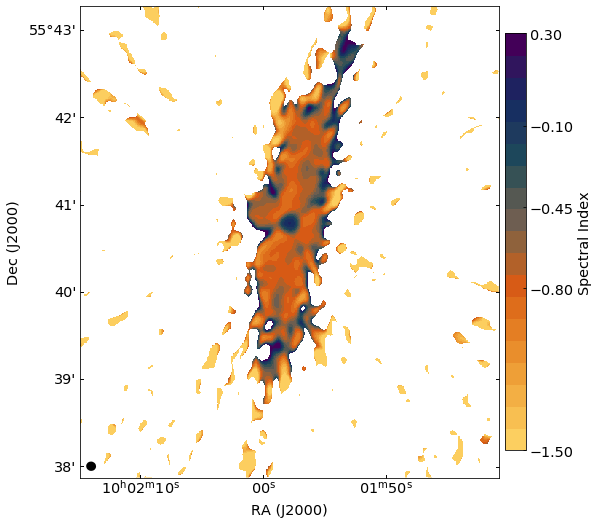

In [10]:
# Plot galaxy both in this notebook and to a png file.  
# This version's data is binned. To make the plot appear continuous increase nstep to 1000 or more.

ticks = [min_value,-0.8,-0.45,-0.1,max_value]
nsteps=19
cbar_name = "Spectral Index"
ver=2

fig, ax = gal.plot_galaxy(fits_file,RA,DEC,ImgSize,shift,cmap,min_value,max_value,ticks=ticks,nsteps=nsteps,cb_name=cbar_name,TrimSwitch=TrimSwitch,figsize=(8,9))

fig.savefig(plt_dir+'/plot_ver'+str(ver)+'_gal.png', bbox_inches = "tight", dpi=300)

What if you want to plot the whole range of data, but keep the steep/flat points the same? Then you need to get the min/max values first. Here's one way to do that.

In [11]:
# Get min/max values 
p_min,p_max = gal.get_galaxy_range(fits_file,RA,DEC,ImgWidth,ImgHeight,shift)

Plot range of  -2.92527 0.94467


Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [12]:
# Set full min/max values
cmap_full = "CC-specindex-full"
# Create spectral index cmap, default steep/flat values used for "steepp" and "flatp" in specindex.py.
spx.create_cmap_specindex(p_min,p_max,name=cmap_full)

creating cmap 'CC-specindex-full' for Matplotlib (1021 steps)
registering cmap 'CC-specindex-full' to Matplotlib


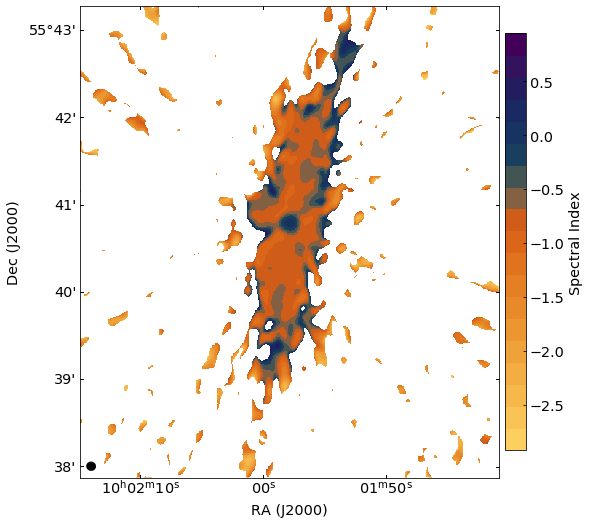

In [13]:
# Plot galaxy
nsteps=19
fig, ax = gal.plot_galaxy(fits_file,RA,DEC,ImgSize,shift,cmap_full,nsteps=nsteps,cb_name=cbar_name,TrimSwitch=TrimSwitch,figsize=(8,9))
fig.savefig(plt_dir+'/plot2_gal_full.png', bbox_inches = "tight",dpi=300)

A word of caution for the above. This colour map is unique for this galaxy's min/max values. To use on another galaxy, you would need to pass in the min/max values from the above galaxy so the steep/flat values stay fixed for another galaxy.

For the full data range galaxy map, you can still pass in tick values as in the example below. If the data range extends beyond the ticks range then we force the colour map to extend the ticks range. WARNING: Do not set the tick range larger than the min/max value when setting the colour map; this will extend the colour map and make the flat and steep points correspond to undesired values.

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


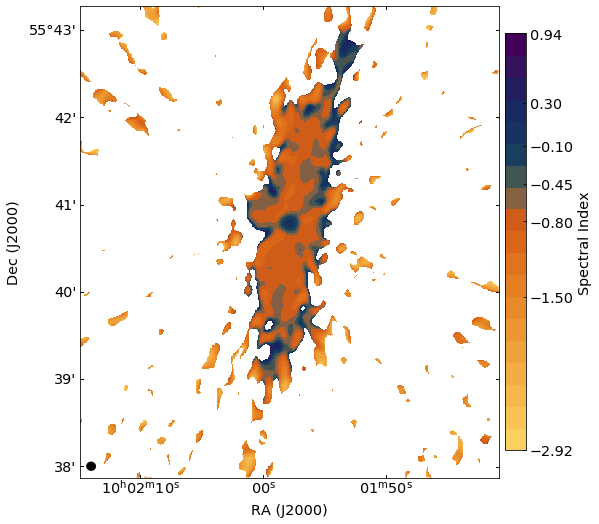

In [14]:
# Plot galaxy
ticks = [-1.5,-0.8,-0.45,-0.1,0.3]
fig, ax = gal.plot_galaxy(fits_file,RA,DEC,ImgSize,shift,cmap_full,ticks=ticks,nsteps=nsteps,cb_name=cbar_name,TrimSwitch=TrimSwitch,figsize=(8,9))
fig.savefig(plt_dir+'/plot2_gal_full_ticks.png', bbox_inches = "tight",dpi=300)

Customizing this colour scheme: In addition you may want to change the divergent (boundary) points. (For example, you want to explore where uncertainties are large or you have a map from which thermal spectral indices have been removed.) This can be done by changing the parameters steep_p and flat_p. 

creating cmap 'CC-specindex-full-custom' for Matplotlib (1021 steps)
registering cmap 'CC-specindex-full-custom' to Matplotlib


Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


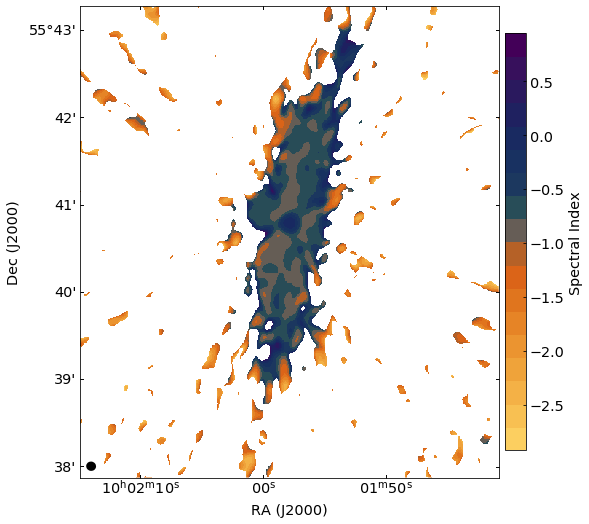

In [15]:
# Customized divergent points.
lowSpInd = -1.2 #The most negative spectral index boundary.
hiSpInd = -0.5  #The most positive spectral index boundary.

# Set full min/max values
cmap_full = "CC-specindex-full-custom"

# Create spectral index cmap.
spx.create_cmap_specindex(p_min,p_max,steep_p=lowSpInd,flat_p=hiSpInd,name=cmap_full)

# Plot galaxy
nsteps=18
fig, ax = gal.plot_galaxy(fits_file,RA,DEC,ImgSize,shift,cmap_full,nsteps=nsteps,cb_name=cbar_name,TrimSwitch=TrimSwitch,figsize=(8,9))
fig.savefig(plt_dir+'/plot2_gal_full_custom.png', bbox_inches = "tight",dpi=300)


Finally, in some situations you may want a colour map that is constant in $L$ and $C$, for example if you want to use an intensity mask (see Figure 21 of [```Norris et al. 2021```](https://ui.adsabs.harvard.edu/abs/2021arXiv210800569N/abstract)). For this, we have created `create_cmap_specindex_constantL`, where you can set the $L$, $C$, and starting $H$ values, as well as the direction to vary hue. The colour map will change hue over 180$^\circ$ so that the end points are complementary colours.

In [16]:
# Set min/max data values for the colour range in the plot. 
min_value = -1.5
max_value = 0.3
L_0=75
C_0=35
H_start=70.
H_dir='left'  # Select colours on the colour wheel in the clockwise direction. For counter-clockwise use 'right' 

# Create spectral index constant L cmap.
cmap_L0 = "CC-specindex-constL"
spx.create_cmap_specindex_constantL(L_0=L_0,C_0=C_0,H_start=H_start,H_dir=H_dir,name=cmap_L0)


creating cmap 'CC-specindex-constL' for Matplotlib (1020 steps)
registering cmap 'CC-specindex-constL' to Matplotlib


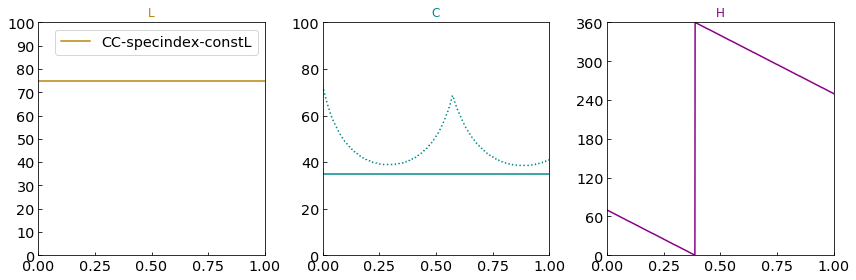

In [17]:
# Let's show the default colour map in LCH space, again rescaled to 0:1 using the plot_path function.
axes = maps.plot_path(cmap_L0, space='LCH', stack='H', axes=[]  , styles=['-' ], legend_label=cmap_L0)

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


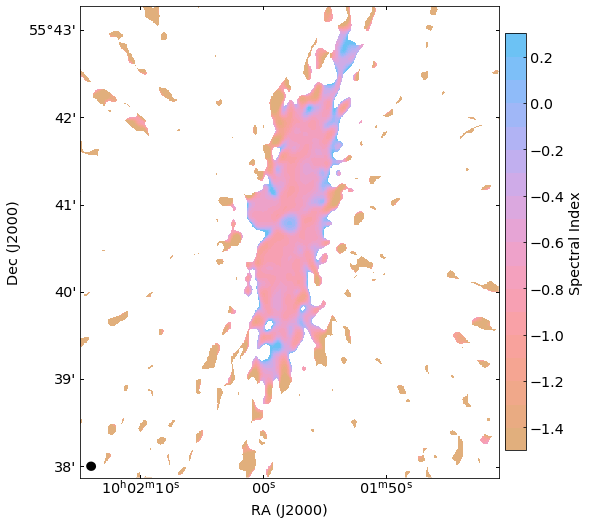

In [18]:
# Plot galaxy
nsteps=18
fig, ax = gal.plot_galaxy(fits_file,RA,DEC,ImgSize,shift,cmap_L0,min_value,max_value,nsteps=nsteps,cb_name=cbar_name,TrimSwitch=TrimSwitch,figsize=(8,9))
fig.savefig(plt_dir+'/plot2_gal_L0.png', bbox_inches = "tight",dpi=300)

The [```4. Slicing the LCH space```](https://nbviewer.org/github/gillesferrand/colourspace/blob/master/4.%20slices.ipynb) tutorial in the [```colourspace```](https://github.com/gillesferrand/colourspace) package is useful to help determine initial inputs for L and C and H_start, which is associated with the minimum value. (For example, Bengal rose ~ 0; red ~ 40;  yellow ~ 100. Add 180 deg to get complementary colours like blue-purple = yellow + 180 = 280.)